In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report


In [5]:
df = pd.read_csv('Student Depression Dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27896 non-null  object 
 2   Age                                    27893 non-null  float64
 3   City                                   27900 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  int64  
 6   Work Pressure                          27901 non-null  int64  
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  int64  
 9   Job Satisfaction                       27901 non-null  int64  
 10  Sleep Duration                         27896 non-null  object 
 11  Di

In [9]:
df['Depression'].value_counts()

Depression
1    16336
0    11565
Name: count, dtype: int64

In [11]:
df.isnull().sum()

id                                       0
Gender                                   5
Age                                      8
City                                     1
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           5
Dietary Habits                           0
Degree                                   4
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         3
Financial Stress                         3
Family History of Mental Illness         4
Depression                               0
dtype: int64

In [17]:
print('Summary of numeric columns:')

print(df.describe())

Summary of numeric columns:
                  id           Age  Academic Pressure  ...  Work/Study Hours  Financial Stress    Depression
count   27901.000000  27893.000000       27901.000000  ...      27898.000000      27898.000000  27901.000000
mean    70442.149421     25.822500           3.141214  ...          7.157036          3.139867      0.585499
std     40641.175216      4.905979           1.381465  ...          3.707748          1.437347      0.492645
min         2.000000     18.000000           0.000000  ...          0.000000          1.000000      0.000000
25%     35039.000000     21.000000           2.000000  ...          4.000000          2.000000      0.000000
50%     70684.000000     25.000000           3.000000  ...          8.000000          3.000000      1.000000
75%    105818.000000     30.000000           4.000000  ...         10.000000          4.000000      1.000000
max    140699.000000     59.000000           5.000000  ...         12.000000          5.000000      

In [23]:
print('Summary of descriptive columns:  ')

print(df.describe(include=['object', 'category']))

Summary of descriptive columns:  
       Gender    City Profession  ...    Degree Have you ever had suicidal thoughts ? Family History of Mental Illness
count   27896   27900      27901  ...     27897                                 27901                            27897
unique      2      52         14  ...        28                                     2                                2
top      Male  Kalyan    Student  ...  Class 12                                   Yes                               No
freq    15543    1570      27870  ...      6078                                 17656                            14397

[4 rows x 8 columns]


In [25]:
df.isnull().sum()

id                                       0
Gender                                   5
Age                                      8
City                                     1
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           5
Dietary Habits                           0
Degree                                   4
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         3
Financial Stress                         3
Family History of Mental Illness         4
Depression                               0
dtype: int64

In [27]:
df['Age'].mean()

25.822500268884667

In [29]:
df['Age'].median()

25.0

In [31]:
df['Work/Study Hours'].mean()

7.157036346691519

In [33]:
df['Work/Study Hours'].median()

8.0

In [35]:
df['Financial Stress'].median()

3.0

In [37]:
df['Financial Stress'].mean()

3.1398666571080365

In [39]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Work/Study Hours'].fillna(df['Work/Study Hours'].mean(),inplace=True)
df['Financial Stress'].fillna(df['Financial Stress'].mean(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_17780\2077362338.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17780\2077362338.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [41]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['City'].fillna(df['City'].mode()[0],inplace=True)
df['Sleep Duration'].fillna(df['Sleep Duration'].mode()[0],inplace=True)
df['Degree'].fillna(df['Degree'].mode()[0],inplace=True)
df['Family History of Mental Illness'].fillna(df['Family History of Mental Illness'].mode()[0],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_17780\1566666571.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_17780\1566666571.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [43]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [47]:
df_encoded = pd.get_dummies(df, columns=['Gender','City','Profession','Sleep Duration','Dietary Habits','Degree',
                                         'Have you ever had suicidal thoughts ?','Family History of Mental Illness'], drop_first=True)

In [49]:
df_encoded

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_Male,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhavna,City_Bhopal,City_Chennai,City_City,City_Delhi,City_Faridabad,City_Gaurav,City_Ghaziabad,City_Harsh,City_Harsha,City_Hyderabad,City_Indore,City_Jaipur,City_Kalyan,City_Kanpur,City_Khaziabad,City_Kibara,City_Kolkata,City_Less Delhi,City_Less than 5 Kalyan,City_Lucknow,City_Ludhiana,City_M.Com,City_M.Tech,City_ME,City_Meerut,City_Mihir,City_Mira,City_Mumbai,City_Nagpur,City_Nalini,City_Nalyan,City_Nandini,City_Nashik,City_Patna,City_Pune,City_Rajkot,City_Rashi,City_Reyansh,City_Saanvi,City_Srinagar,City_Surat,City_Thane,City_Vaanya,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam,Profession_Chef,Profession_Civil Engineer,Profession_Content Writer,Profession_Digital Marketer,Profession_Doctor,Profession_Educational Consultant,Profession_Entrepreneur,Profession_Lawyer,Profession_Manager,Profession_Pharmacist,Profession_Student,Profession_Teacher,Profession_UX/UI Designer,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Others,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Degree_B.Com,Degree_B.Ed,Degree_B.Pharm,Degree_B.Tech,Degree_BA,Degree_BBA,Degree_BCA,Degree_BE,Degree_BHM,Degree_BSc,Degree_Class 12,Degree_LLB,Degree_LLM,Degree_M.Com,Degree_M.Ed,Degree_M.Pharm,Degree_M.Tech,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,2,33.0,5,0,8.97,2,0,3.0,1.0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,8,24.0,2,0,5.90,5,0,3.0,2.0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,26,31.0,3,0,7.03,5,0,9.0,1.0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,30,28.0,3,0,5.59,2,0,4.0,5.0,1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,F

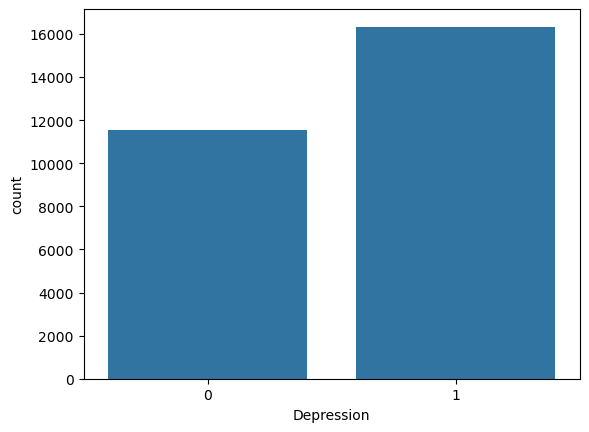

In [55]:
sns.countplot(x='Depression', data=df)
plt.show()

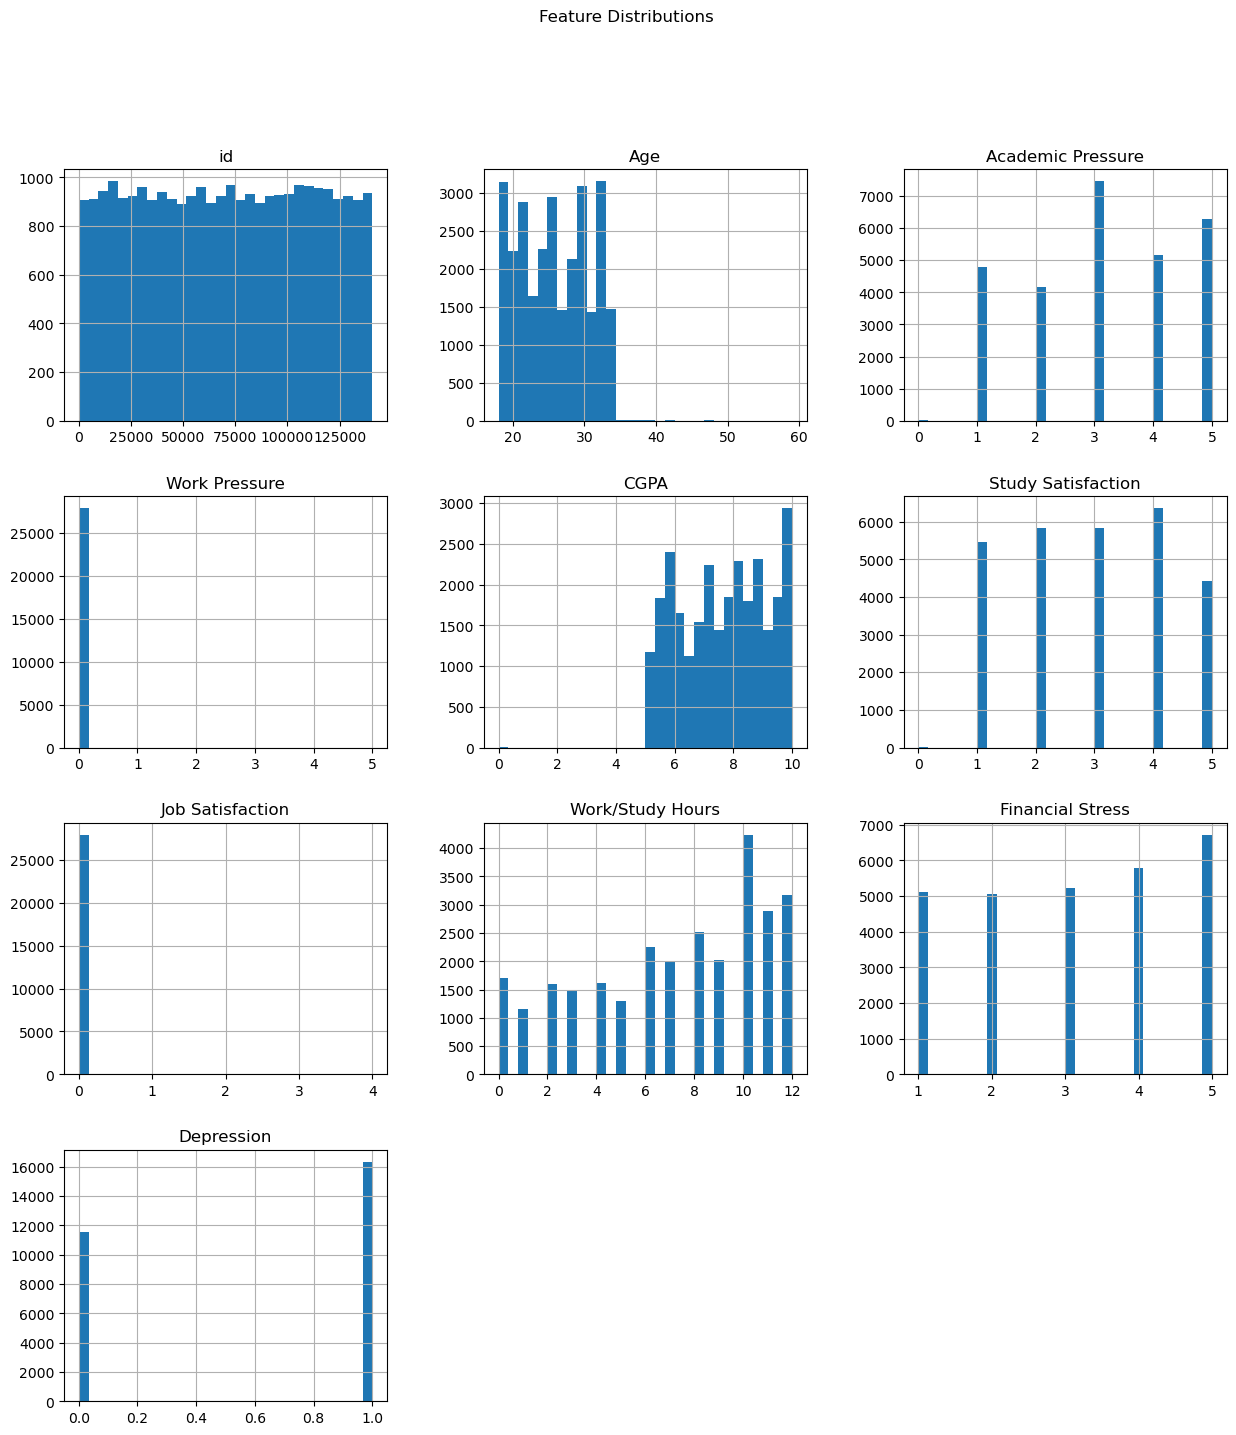

In [57]:
df.hist(bins=30, figsize=(15,16))
plt.suptitle("Feature Distributions")
plt.show()

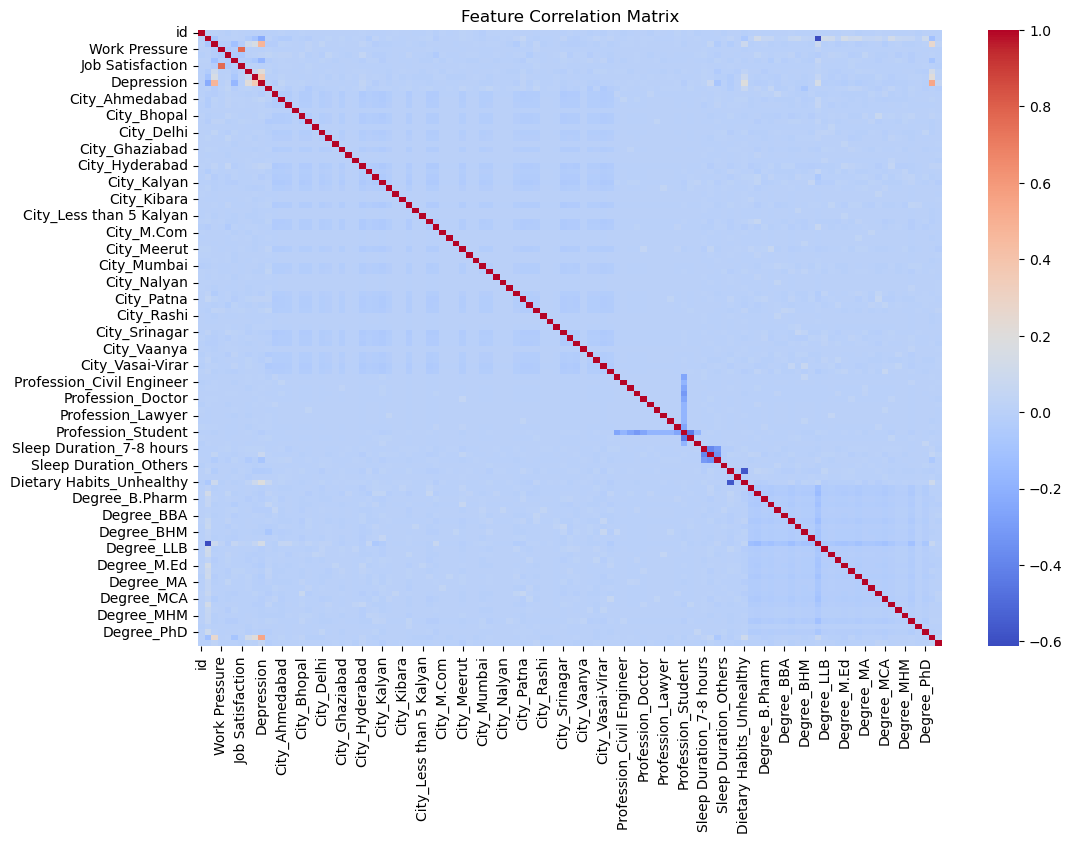

In [61]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [65]:
X=df_encoded.drop(columns=['Depression'])
y=df_encoded['Depression']
X,y

(           id   Age  ...  Have you ever had suicidal thoughts ?_Yes  Family History of Mental Illness_Yes
 0           2  33.0  ...                                       True                                 False
 1           8  24.0  ...                                      False                                  True
 2          26  31.0  ...                                      False                                  True
 3          30  28.0  ...                                       True                                  True
 4          32  25.0  ...                                       True                                 False
 ...       ...   ...  ...                                        ...                                   ...
 27896  140685  27.0  ...                                       True                                  True
 27897  140686  27.0  ...                                      False                                  True
 27898  140689  31.0  ...            

In [67]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=50)
X_train

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Gender_Male,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhavna,City_Bhopal,City_Chennai,City_City,City_Delhi,City_Faridabad,City_Gaurav,City_Ghaziabad,City_Harsh,City_Harsha,City_Hyderabad,City_Indore,City_Jaipur,City_Kalyan,City_Kanpur,City_Khaziabad,City_Kibara,City_Kolkata,City_Less Delhi,City_Less than 5 Kalyan,City_Lucknow,City_Ludhiana,City_M.Com,City_M.Tech,City_ME,City_Meerut,City_Mihir,City_Mira,City_Mumbai,City_Nagpur,City_Nalini,City_Nalyan,City_Nandini,City_Nashik,City_Patna,City_Pune,City_Rajkot,City_Rashi,City_Reyansh,City_Saanvi,City_Srinagar,City_Surat,City_Thane,City_Vaanya,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam,Profession_Chef,Profession_Civil Engineer,Profession_Content Writer,Profession_Digital Marketer,Profession_Doctor,Profession_Educational Consultant,Profession_Entrepreneur,Profession_Lawyer,Profession_Manager,Profession_Pharmacist,Profession_Student,Profession_Teacher,Profession_UX/UI Designer,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Others,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Degree_B.Com,Degree_B.Ed,Degree_B.Pharm,Degree_B.Tech,Degree_BA,Degree_BBA,Degree_BCA,Degree_BE,Degree_BHM,Degree_BSc,Degree_Class 12,Degree_LLB,Degree_LLM,Degree_M.Com,Degree_M.Ed,Degree_M.Pharm,Degree_M.Tech,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
16080,81301,27.0,4,0,7.88,2,0,2.0,5.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
17691,89574,21.0,1,0,9.87,5,0,3.0,2.0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
10575,53559,24.0,3,0,9.04,2,0,6.0,5.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False
23452,118188,33.0,3,0,7.15,4,0,10.0,4.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,F

In [69]:
X_test

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Gender_Male,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhavna,City_Bhopal,City_Chennai,City_City,City_Delhi,City_Faridabad,City_Gaurav,City_Ghaziabad,City_Harsh,City_Harsha,City_Hyderabad,City_Indore,City_Jaipur,City_Kalyan,City_Kanpur,City_Khaziabad,City_Kibara,City_Kolkata,City_Less Delhi,City_Less than 5 Kalyan,City_Lucknow,City_Ludhiana,City_M.Com,City_M.Tech,City_ME,City_Meerut,City_Mihir,City_Mira,City_Mumbai,City_Nagpur,City_Nalini,City_Nalyan,City_Nandini,City_Nashik,City_Patna,City_Pune,City_Rajkot,City_Rashi,City_Reyansh,City_Saanvi,City_Srinagar,City_Surat,City_Thane,City_Vaanya,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam,Profession_Chef,Profession_Civil Engineer,Profession_Content Writer,Profession_Digital Marketer,Profession_Doctor,Profession_Educational Consultant,Profession_Entrepreneur,Profession_Lawyer,Profession_Manager,Profession_Pharmacist,Profession_Student,Profession_Teacher,Profession_UX/UI Designer,Sleep Duration_7-8 hours,Sleep Duration_Less than 5 hours,Sleep Duration_More than 8 hours,Sleep Duration_Others,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Degree_B.Com,Degree_B.Ed,Degree_B.Pharm,Degree_B.Tech,Degree_BA,Degree_BBA,Degree_BCA,Degree_BE,Degree_BHM,Degree_BSc,Degree_Class 12,Degree_LLB,Degree_LLM,Degree_M.Com,Degree_M.Ed,Degree_M.Pharm,Degree_M.Tech,Degree_MA,Degree_MBA,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
2064,10599,21.0,4,0,8.28,2,0,8.0,3.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
26135,131798,27.0,3,0,9.21,3,0,7.0,4.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True
873,4480,22.0,4,0,6.33,5,0,6.0,4.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14075,71224,21.0,3,0,9.88,3,0,6.0,3.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,F

In [71]:
y_train

16080    1
17691    0
10575    1
23452    0
17601    1
        ..
15649    1
22637    0
10123    0
5600     1
14000    1
Name: Depression, Length: 19530, dtype: int64

In [73]:
y_test

2064     1
26135    1
873      1
14075    1
15160    1
        ..
21043    1
19871    1
20597    0
19087    1
2222     0
Name: Depression, Length: 8371, dtype: int64

In [75]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.27057368,  0.2370761 ,  0.62821248, ..., -0.13896426,
         0.75879013, -0.96487655],
       [ 0.47439518, -0.98748961, -1.53907064, ..., -0.13896426,
         0.75879013, -0.96487655],
       [-0.41290465, -0.37520675, -0.09421523, ..., -0.13896426,
         0.75879013, -0.96487655],
       ...,
       [-0.47082613, -1.19158389, -1.53907064, ..., -0.13896426,
        -1.31788746,  1.03640202],
       [-1.03683547, -0.37520675, -1.53907064, ..., -0.13896426,
         0.75879013, -0.96487655],
       [ 0.01464502, -0.57930104,  0.62821248, ..., -0.13896426,
         0.75879013, -0.96487655]])

In [77]:
X_test=scaler.transform(X_test)
X_test

array([[-1.47130812, -0.98748961,  0.62821248, ..., -0.13896426,
         0.75879013,  1.03640202],
       [ 1.51466586,  0.2370761 , -0.09421523, ..., -0.13896426,
         0.75879013,  1.03640202],
       [-1.62206163, -0.78339532,  0.62821248, ..., -0.13896426,
        -1.31788746, -0.96487655],
       ...,
       [ 0.83552363,  1.4616418 , -0.81664293, ..., -0.13896426,
        -1.31788746,  1.03640202],
       [ 0.6501552 ,  1.05345324,  0.62821248, ..., -0.13896426,
         0.75879013, -0.96487655],
       [-1.45384052, -1.39567818, -0.09421523, ..., -0.13896426,
         0.75879013, -0.96487655]])

In [79]:
clf = LogisticRegression()
clf

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [81]:
clf.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [83]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [85]:
print('Accuracy Score:',accuracy_score(y_test,y_pred))
print('Precision score:',precision_score(y_test,y_pred))
print('Recall score:',recall_score(y_test,y_pred))
print('F1 score:',f1_score(y_test,y_pred))

Accuracy Score: 0.84410464699558
Precision score: 0.8554051402785953
Recall score: 0.8847402597402597
F1 score: 0.8698254364089776


In [87]:
print('confusion matrix:',confusion_matrix(y_test,y_pred))
print('classifictaion report:',classification_report(y_test,y_pred))

confusion matrix: [[2706  737]
 [ 568 4360]]
classifictaion report:               precision    recall  f1-score   support

           0       0.83      0.79      0.81      3443
           1       0.86      0.88      0.87      4928

    accuracy                           0.84      8371
   macro avg       0.84      0.84      0.84      8371
weighted avg       0.84      0.84      0.84      8371

